January, 2016: Getting familiarized with ANHA model output.

In [1]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d.axes3d import Axes3D
from IPython.core.display import Image, display
from mpl_toolkits.basemap import Basemap

%matplotlib inline

### Model Data

In [2]:
dataT = nc.Dataset('/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myANHA/EXP00/dyn_off/ANHA4-EXH001_gridT_y2002m07d19.nc','r')

In [3]:
dataW = nc.Dataset('/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myANHA/EXP00/dyn_off/ANHA4-EXH001_gridW_y2002m07d19.nc','r')

In [4]:
mz = dataT.variables['somxl010']
ssh = dataT.variables['sossheig']
sal = dataT.variables['vosaline']
temp = dataT.variables['votemper']
#t = dataT.variables['time_counter']
#z = dataT.variables['deptht']
#lat = dataT.variables['nav_lat']
#lon = dataT.variables['nav_lon']

In [5]:
#lon = dataW.variables['nav_lon']
#lat = dataW.variables['nav_lat']
z = dataW.variables['depthw']
t = dataW.variables['time_counter']
w = dataW.variables['vovecrtz']
kv = dataW.variables['votkeavt']

In [6]:
grid=nc.Dataset('/ocean/xiaoxiny/research/data/Jasper/ANHA4_bathy_etopo1_gebco1_smoothed_coast_corrected_mar10.nc')

In [7]:
for dimobj in grid.variables.values():
    print dimobj

<type 'netCDF4._netCDF4.Variable'>
float32 nav_lon(y, x)
unlimited dimensions: 
current shape = (800, 544)
filling off

<type 'netCDF4._netCDF4.Variable'>
float32 nav_lat(y, x)
unlimited dimensions: 
current shape = (800, 544)
filling off

<type 'netCDF4._netCDF4.Variable'>
float32 Bathymetry(y, x)
    units: meters
    long_name: Median depth by area
unlimited dimensions: 
current shape = (800, 544)
filling off



In [8]:
bathy = grid.variables['Bathymetry'][:,:]
lon = grid.variables['nav_lon'][:,:]
lat = grid.variables['nav_lat'][:,:]

### Full Bathymetry

/home/imachuca/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


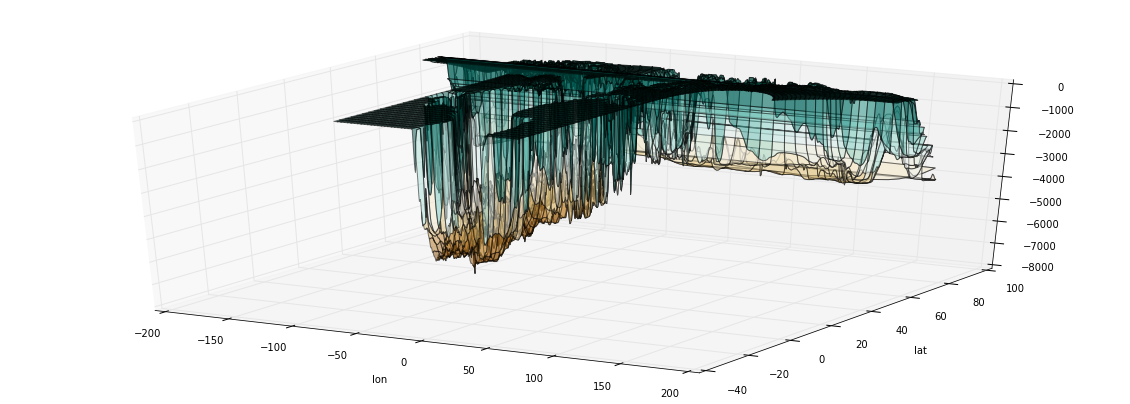

In [9]:
fig = plt.figure(figsize=(20,7))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(lon[:],lat[:],-bathy[:],cmap=cm.BrBG, alpha=0.5)
ax.set_ylabel('lat')
ax.set_xlabel('lon')
ax.view_init(elev=30, azim=-60)

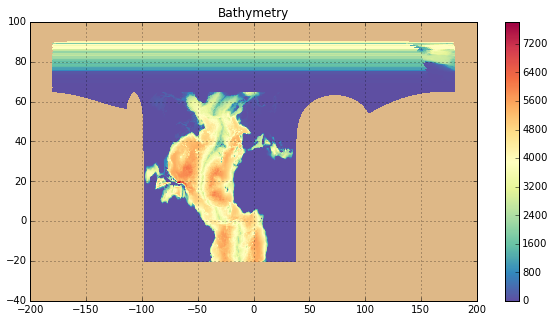

In [10]:
fig, ax= plt.subplots(1,1, figsize=(10, 5))
cmap = plt.get_cmap('Spectral_r')
land_colour = 'burlywood'
ax.set_axis_bgcolor(land_colour)
cmap.set_bad(land_colour)
mesh= ax.pcolormesh(lon, lat, bathy, cmap=cmap)
cbar = plt.colorbar(mesh)
ax.set_title('Bathymetry')
ax.grid()

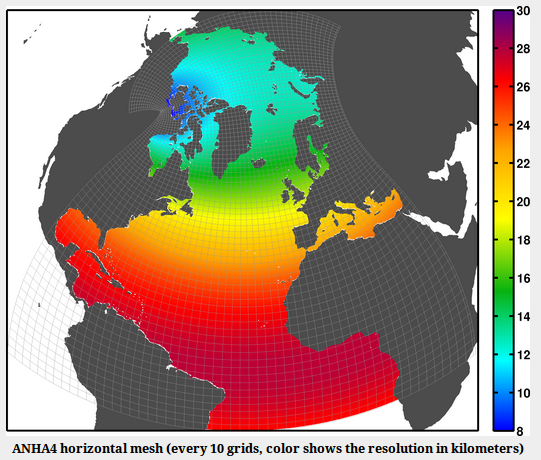

In [11]:
x = Image(filename='/ocean/imachuca/Canyons/Mackenzie_Analysis/images/ANHA4domain.png')
display(x)

Let Canyon region be 69 to 71 degrees north (latitude) and 144 to 132 degrees west (longitude)

### Attempt at slicing canyon area

In [12]:
bathy.shape # 800 is lat, 544 is lon

(800, 544)

In [13]:
x_slice = np.arange(200,300)
y_slice = np.arange(200,300)
bathy[y_slice, x_slice].shape

(100,)

Code trying to find out what indices have the lats/lons I'm interested in

In [14]:
b = np.where(lon <= -132)
lonM = lon[(b[0][:]),(b[1][:])]
lonM.min(), lonM.max(), lon.min(), lon.max()

(-179.99701, -132.0033, -179.99701, 179.99971)

In [15]:
lon.shape, lonM.shape

((800, 544), (23644,))

In [16]:
c = np.where(lonM >= -144)
lonM = lonM[c[0]]
lonM.min(), lonM.max()

(-143.99832, -132.0033)

In [32]:
lonM.shape

(8172,)

In [17]:
d = np.where(lat <= 71)
latM = lat[(d[0][:]),(d[1][:])]
latM.min(), latM.max(), lat.min(), lat.max()

(-20.076111, 70.999794, -20.076111, 89.947868)

In [18]:
e = np.where(latM >= 69)
latM = latM[e[0]]
latM.min(), latM.max()

(69.00032, 70.999794)

Slicing like this doesn't readily work because the data gets converted to 1-D.

### Attempt at extracting any region

In [21]:
def extract_region(new_set, orig_set, min_lat, max_lat, min_lon, max_lon):
    for j in range(800):
        for i in range(544):
            if j >= min_lat and j <=max_lat and i >=min_lon and i <=max_lon:
                new_set[j,i] = orig_set[j,i]
    return new_set


In [22]:
min_lat = 100
max_lat = 150
min_lon = 100
max_lon = 150
lat_len = max_lat - min_lat
lon_len = max_lon - min_lon

In [26]:
bathy_new = np.zeros(shape=(800,544))
lon_new = np.zeros(shape=(800,544))
lat_new = np.zeros(shape=(800,544))

bathy_new = extract_region(bathy_new, bathy, min_lat, max_lat, min_lon, max_lon)
lon_new = extract_region(lon_new, lon, min_lat, max_lat, min_lon, max_lon)
lat_new = extract_region(lat_new, lat, min_lat, max_lat, min_lon, max_lon)

In [27]:
bathy_new.shape

(800, 544)

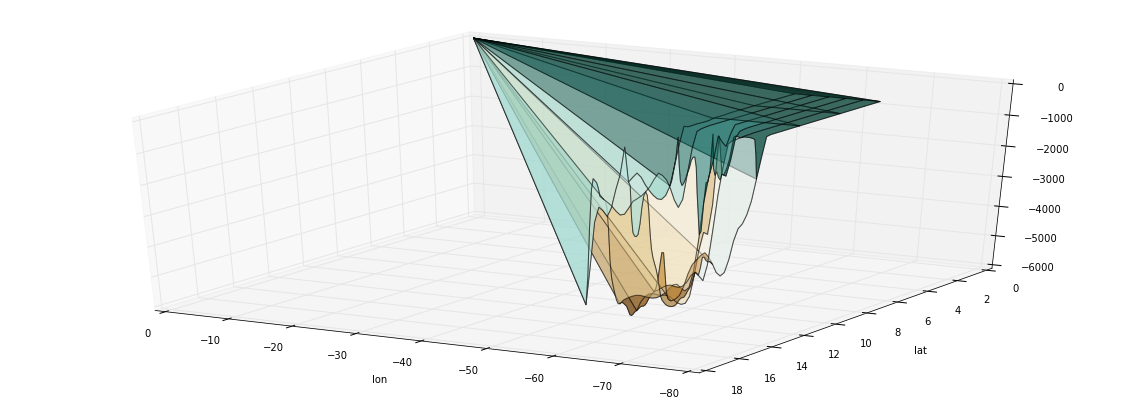

In [31]:
fig = plt.figure(figsize=(20,7))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(lon_new[:],lat_new[:],-bathy_new[:],cmap=cm.BrBG, alpha=0.5)
ax.set_ylabel('lat')
ax.set_xlabel('lon')
ax.view_init(elev=30, azim=120)

In [32]:
sal.shape

(1, 50, 800, 544)

In [33]:
temp.shape

(1, 50, 800, 544)

In [34]:
bathy.shape

(800, 544)

### Basemap

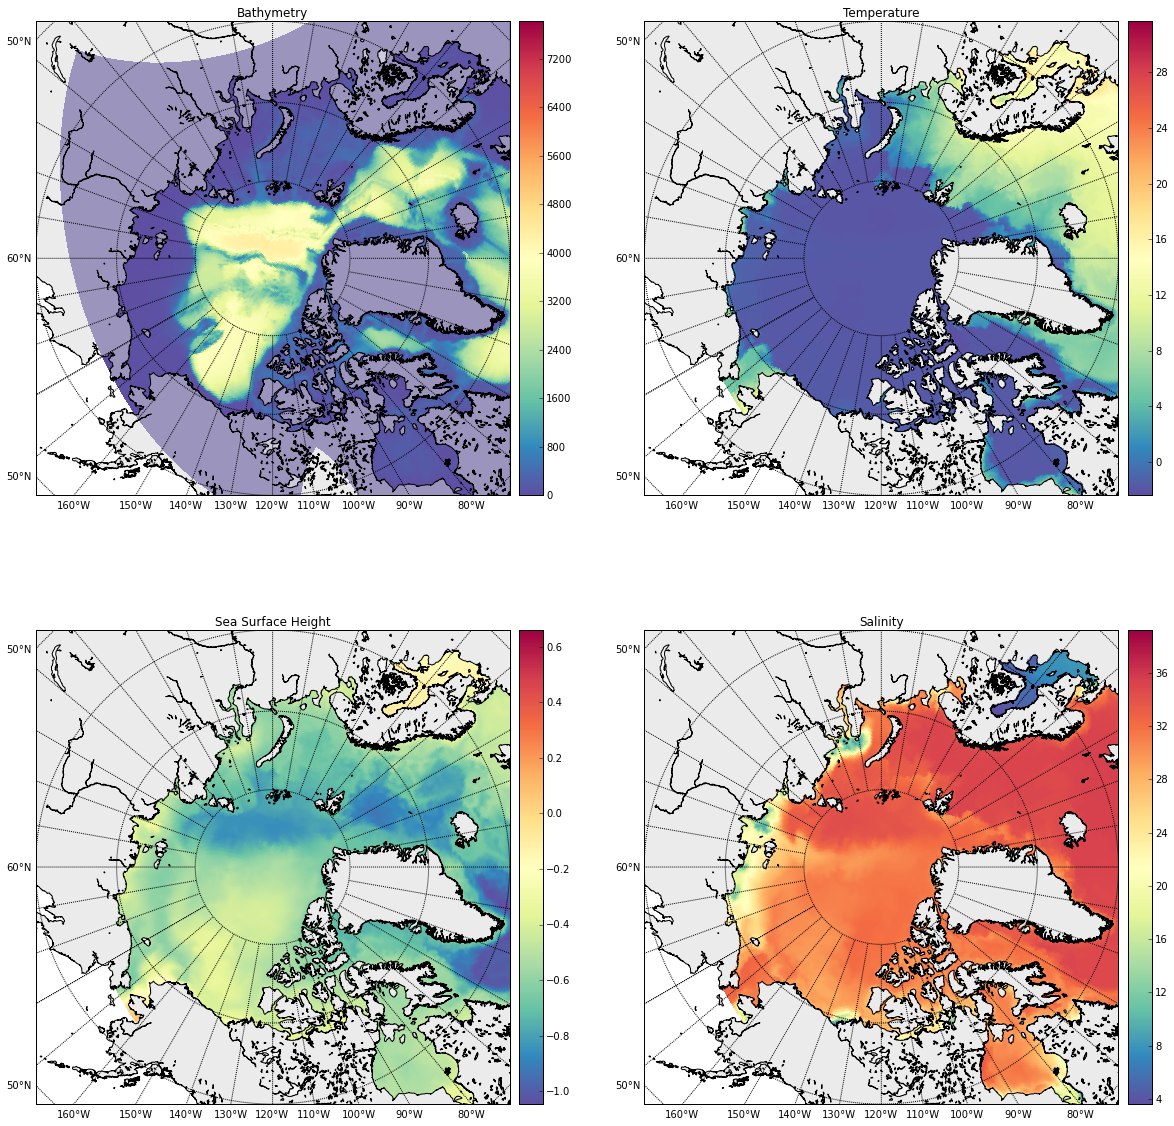

In [46]:
def add_map_details(m):
    m.drawcoastlines()
    m.fillcontinents(color = '0.85', alpha=0.5)
    m.drawparallels(np.arange(0.,91,10.), labels=[1, 0, 0, 0])
    m.drawmeridians(np.arange(-180.,181.,10.), labels=[0, 0, 0, 1])

def make_basemap(var, var_n):
    m = Basemap(projection='npstere', boundinglat=60, lon_0=240, resolution='i')
    add_map_details(m)
    x_lon, y_lat = m(lon, lat)
    p = m.pcolor(x_lon, y_lat, var, cmap = 'Spectral_r')
    cbar = m.colorbar(p)
    plt.title(var_n)
    

fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(2,2,1)
make_basemap(bathy, 'Bathymetry')
ax2 = fig.add_subplot(2,2,2)
make_basemap(temp[0,0,:,:], 'Temperature')
ax3 = fig.add_subplot(2,2,3)
make_basemap(ssh[0,:,:], 'Sea Surface Height')
ax4 = fig.add_subplot(2,2,4)
make_basemap(sal[0,0,:,:], 'Salinity')

plt.show()


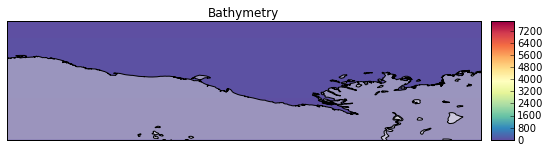

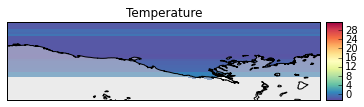

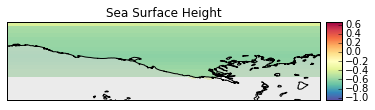

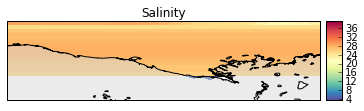

In [19]:
def make_basemap_canyon(var, var_n):
    m = Basemap(projection='cyl', llcrnrlat=68, urcrnrlat=71, llcrnrlon=-144, urcrnrlon=-132, resolution='h')   
    m.drawcoastlines()
    m.fillcontinents(color = '0.85',alpha=0.5)
    plt.title(var_n)
    x_lon, y_lat = m(lon, lat)
    p = ax.pcolor(x_lon, y_lat, var, cmap = 'Spectral_r')
    cbar = ax.colorbar(p)
    plt.show()

fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(2,2,1)
make_basemap_canyon(bathy, 'Bathymetry')
ax2 = fig.add_subplot(2,2,2)
make_basemap_canyon(temp[0,0,:,:], 'Temperature')
ax3 = fig.add_subplot(2,2,3)
make_basemap_canyon(ssh[0,:,:], 'Sea Surface Height')
ax4 = fig.add_subplot(2,2,4)
make_basemap_canyon(sal[0,0,:,:], 'Salinity')

### Pcolormesh

(-140, -130, 68, 72)

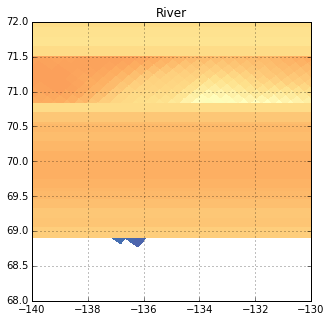

In [57]:
fig, (ax)= plt.subplots(1,1, figsize=(5, 5))
cmap = plt.get_cmap('Spectral_r')
#land_colour = 'burlywood'
#cmap.set_bad(land_colour)
#ax.set_axis_bgcolor(land_colour)
mesh = ax.pcolor(lon, lat, sal[0,0,:,:], cmap=cmap)
ax.set_title('River')
ax.grid()
ax.axis((-140, -130, 68, 72))

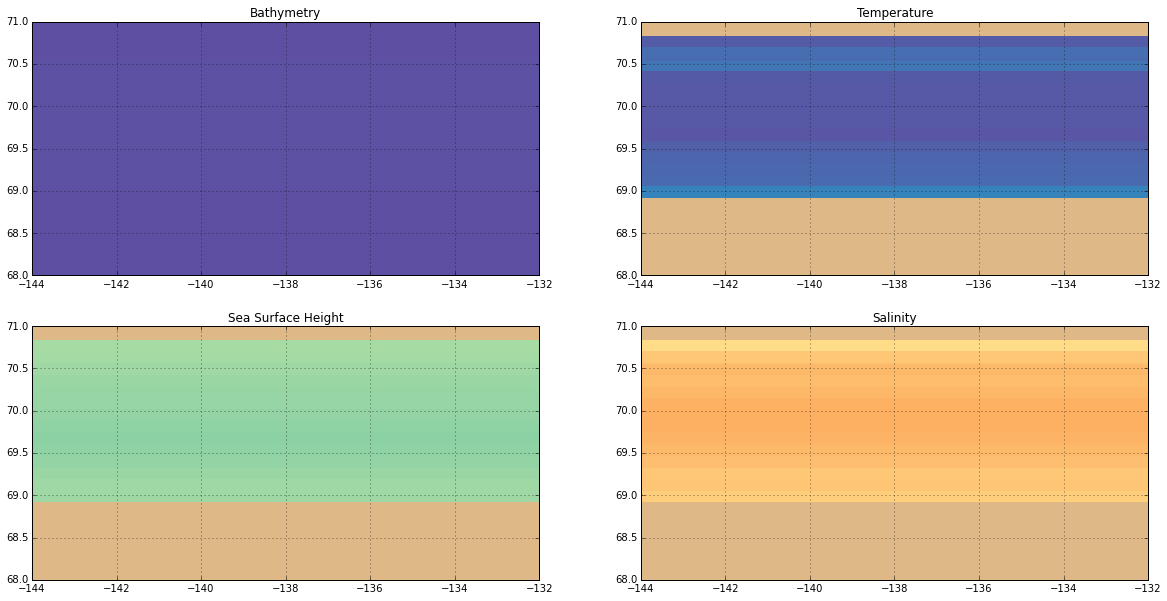

In [47]:
cmap = plt.get_cmap('Spectral_r')
land_colour = 'burlywood'
cmap.set_bad(land_colour)

def make_pcolormesh_canyon(ax, cmap, var, var_n):
    ax.set_axis_bgcolor(land_colour)
    mesh = ax.pcolormesh(lon, lat, var, cmap=cmap)
    ax.set_title(var_n)
    ax.grid()
    ax.axis((-144, -132, 68, 71))

fig, ([ax1,ax2],[ax3,ax4])= plt.subplots(2,2, figsize=(20, 10))
make_pcolormesh_canyon(ax1, cmap, bathy, 'Bathymetry')
make_pcolormesh_canyon(ax2, cmap, temp[0,0,:,:], 'Temperature')
make_pcolormesh_canyon(ax3, cmap, ssh[0,:,:], 'Sea Surface Height')
make_pcolormesh_canyon(ax4, cmap, sal[0,0,:,:], 'Salinity')


### 3D

(-50, 0, 0, -19)

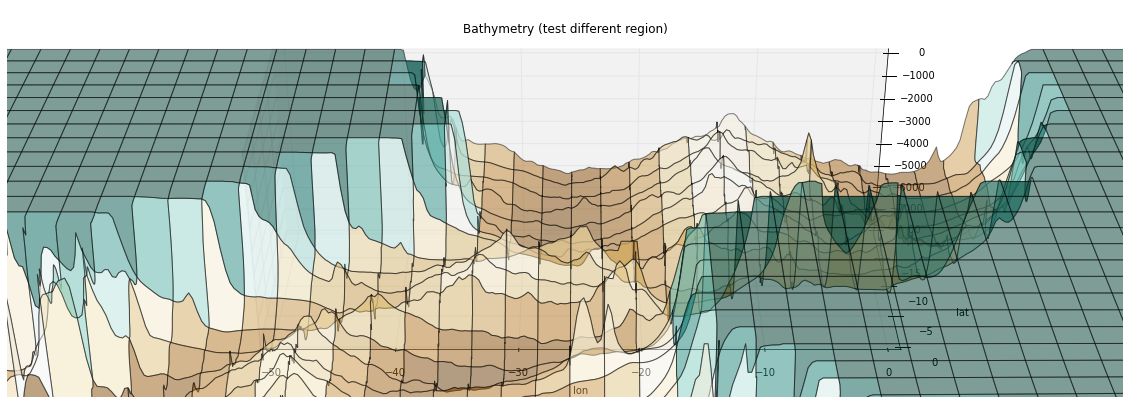

In [29]:
fig = plt.figure(figsize=(20,7))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(lon[:],lat[:],-bathy[:],cmap=cm.BrBG, alpha=0.5)
ax.set_ylabel('lat')
ax.set_xlabel('lon')
ax.set_title('Bathymetry (test different region)')
ax.view_init(elev=30, azim=-90)

#plt.axis((-144, -132, 69, 71))
plt.axis((-50, 0, 0, -19))

(-144, -132, 69, 71)

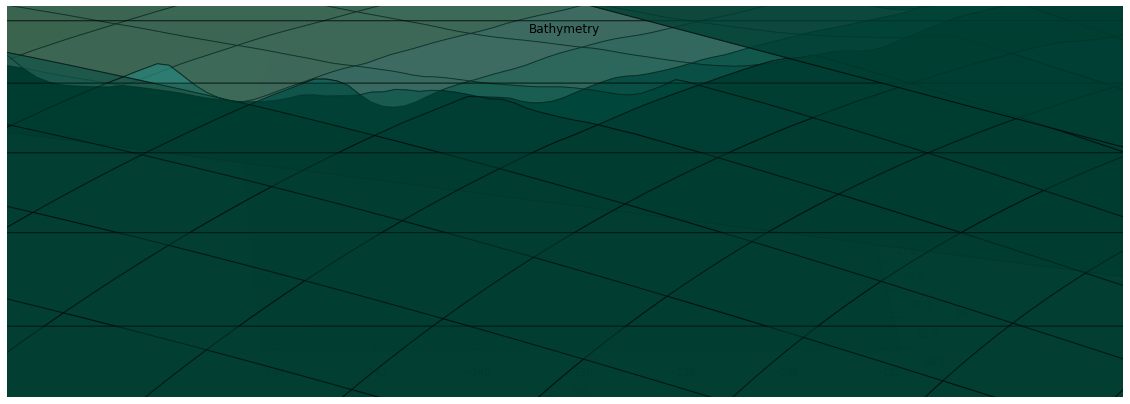

In [26]:
fig = plt.figure(figsize=(20,7))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(lon[:],lat[:],-bathy[:],cmap=cm.BrBG, alpha=0.5)
ax.set_ylabel('lat')
ax.set_xlabel('lon')
ax.set_title('Bathymetry')
ax.view_init(elev=30, azim=-90)

plt.axis((-144, -132, 69, 71))